In [1]:
from pydub import AudioSegment
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
import os
result = os.environ['PATH']
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\ffmpeg-2024-09-22-git-a577d313b2-full_build\\bin'

In [3]:
mp4_file_names = [
    'home_water_bottle_0_elvis_100',
    'home_water_bottle_0_elvis_101',
    'home_water_bottle_0_elvis_103',
    'library_water_bottle_0_elvis_104',
    'library_water_bottle_0_elvis_105',
    'library_water_bottle_0_jayesh_203(streamlabs)'
]

m4a_file_names = [
    'library_water_bottle_0_jayesh_200',
    'library_water_bottle_0_jayesh_201'
]

In [4]:
file_names = mp4_file_names + m4a_file_names

In [5]:
times = {
    'home_water_bottle_0_elvis_100': (5, 15),
    'home_water_bottle_0_elvis_101': (5, 23),
    'home_water_bottle_0_elvis_103': (5, 16),
    'library_water_bottle_0_elvis_104': (5, 16),
    'library_water_bottle_0_elvis_105': (5, 16),
    'library_water_bottle_0_jayesh_203(streamlabs)': (5, 16),
    'library_water_bottle_0_jayesh_200': (3, 13),
    'library_water_bottle_0_jayesh_201': (4, 17)
}

In [6]:
audio_datas = []
for file_name in mp4_file_names:
    audio_datas.append(AudioSegment.from_file(file_name + '.mp4', 'mp4'))
for file_name in m4a_file_names:
    audio_datas.append(AudioSegment.from_file(file_name + '.m4a', 'm4a'))

In [7]:
# convert to numpy array
audio_datas_np = []
for audio_data in audio_datas:
    audio_data_np = np.array(audio_data.get_array_of_samples())
    audio_data_resample = librosa.resample(audio_data_np.astype(float), orig_sr = audio_data.frame_rate, target_sr = 22050)
    audio_datas_np.append(audio_data_resample)

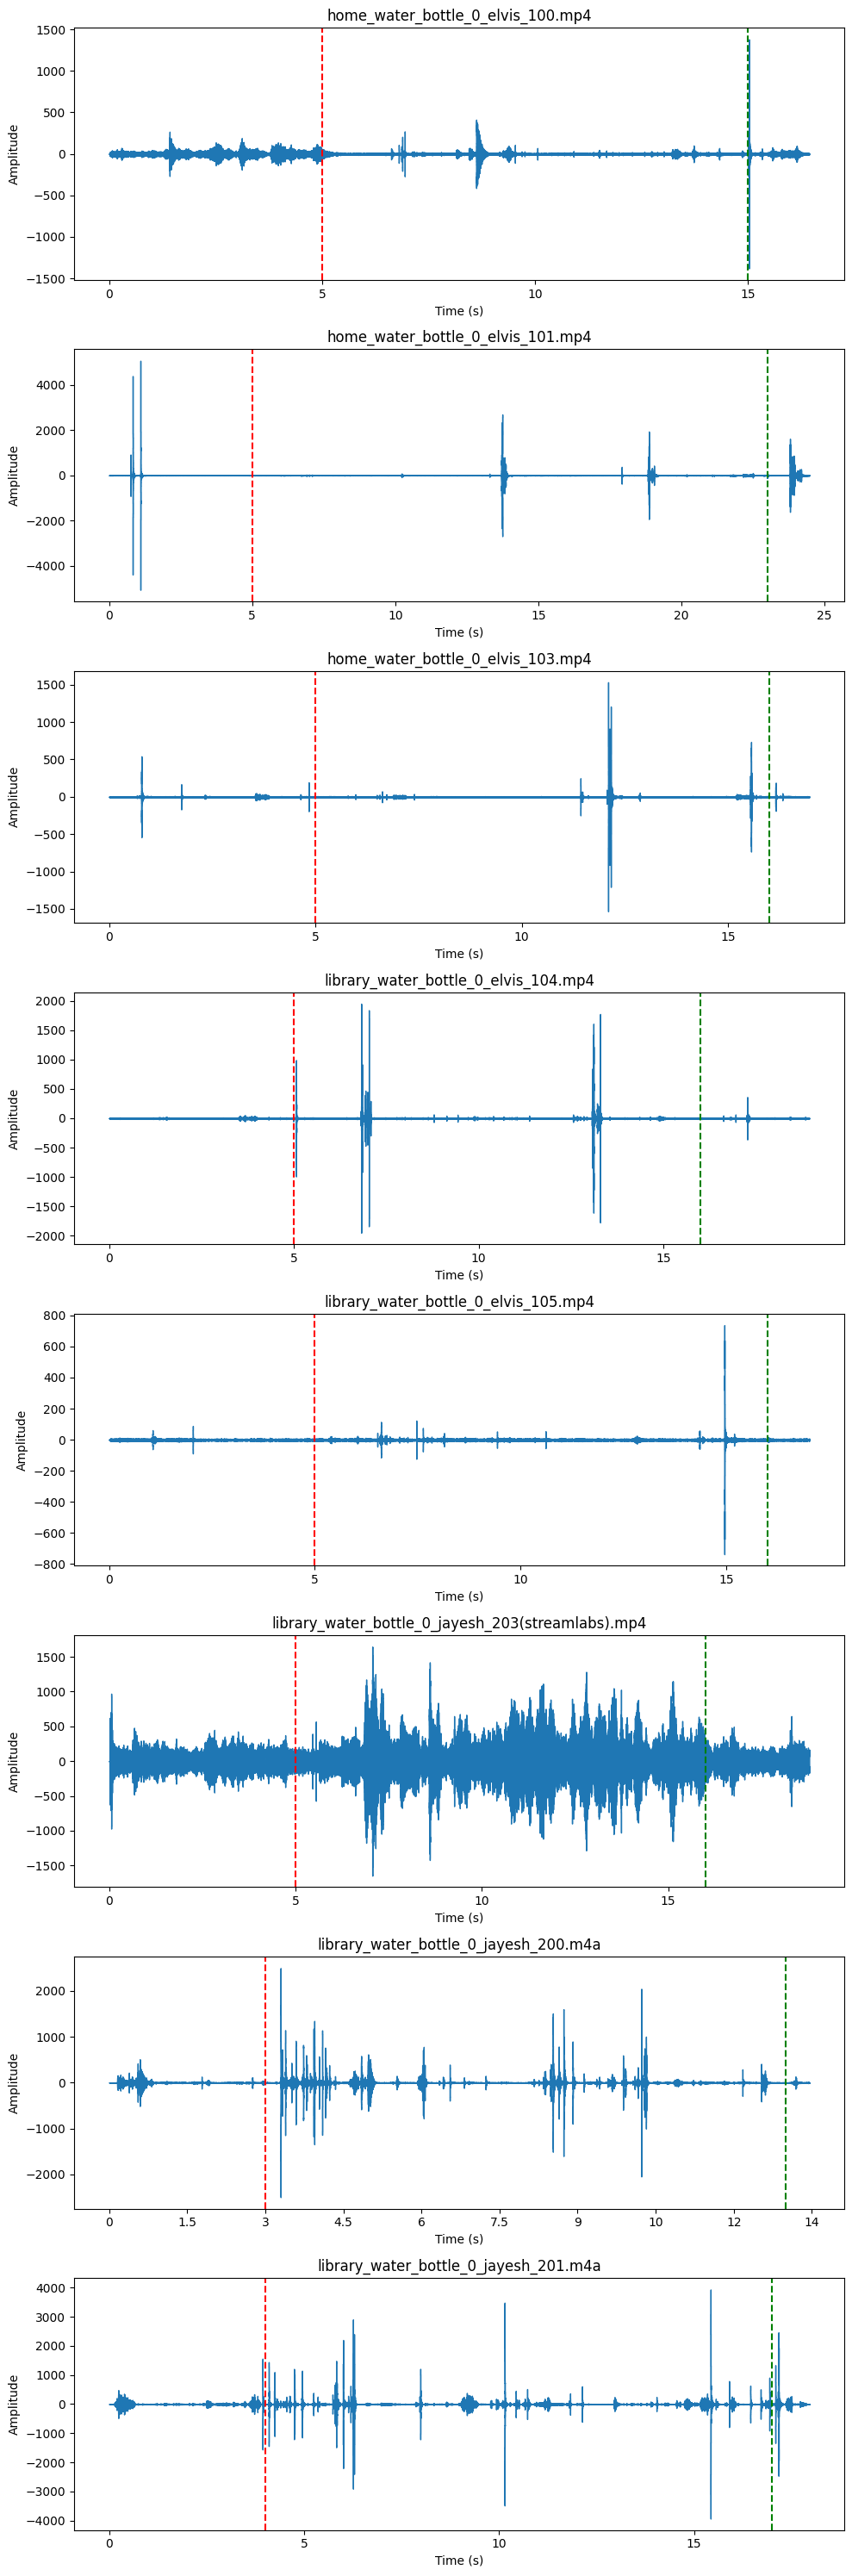

In [9]:
# plot the audio data of all 7 audio files
fig, axs = plt.subplots(8, 1, figsize=(10, 30))
for i, audio_data in enumerate(audio_datas_np):
    librosa.display.waveshow(audio_data, sr=audio_datas[i].frame_rate, ax=axs[i])
    # plot the start and end time using times dict
    axs[i].axvline(x=times[file_names[i]][0], color='r', linestyle='--')
    axs[i].axvline(x=times[file_names[i]][1], color='g', linestyle='--')
    axs[i].set_title(mp4_file_names[i] + '.mp4' if i < 6 else m4a_file_names[i - 6] + '.m4a')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Amplitude')
# avoid overlapping
plt.tight_layout()
plt.show()


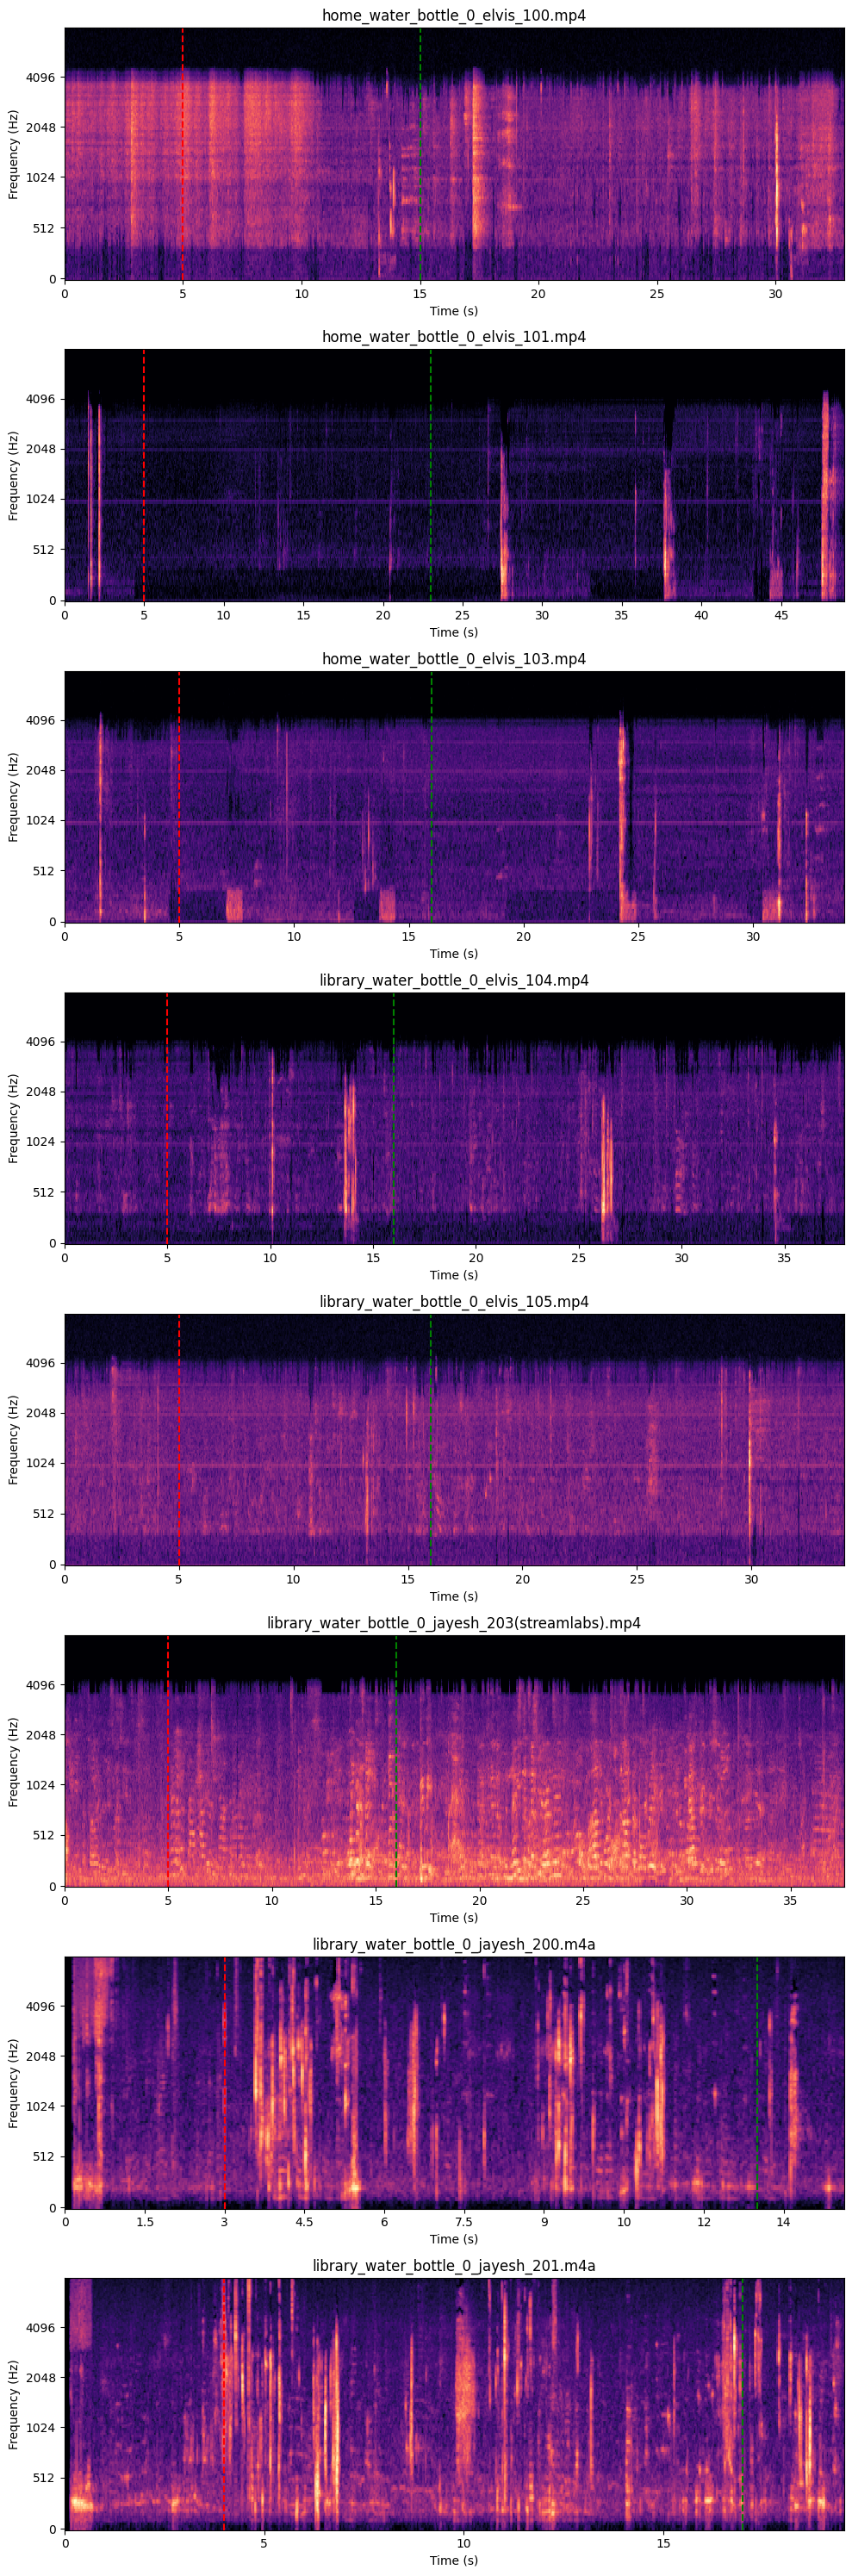

In [10]:
# plot all the spectrograms 
fig, axs = plt.subplots(8, 1, figsize=(10, 30))
for i, audio_data in enumerate(audio_datas_np):
    # Generate and plot the spectrogram (Mel-scaled)
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=22050, n_mels=128, fmax=8000)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    # Plot the spectrogram
    librosa.display.specshow(log_spectrogram, sr=22050, x_axis='time', y_axis='mel', fmax=8000, ax=axs[i])
    # plot the start and end time using times dict
    axs[i].axvline(x=times[file_names[i]][0], color='r', linestyle='--')
    axs[i].axvline(x=times[file_names[i]][1], color='g', linestyle='--')
    axs[i].set_title(mp4_file_names[i] + '.mp4' if i < 6 else m4a_file_names[i - 6] + '.m4a')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
# # Generate and plot the spectrogram (Mel-scaled)
# spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128, fmax=8000)
# log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# # Plot the spectrogram
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
# plt.colorbar(format='%+2.0f dB')
# plt.title("Mel-frequency Spectrogram")
# plt.xlabel("Time (s)")
# plt.ylabel("Frequency (Hz)")
# plt.show()


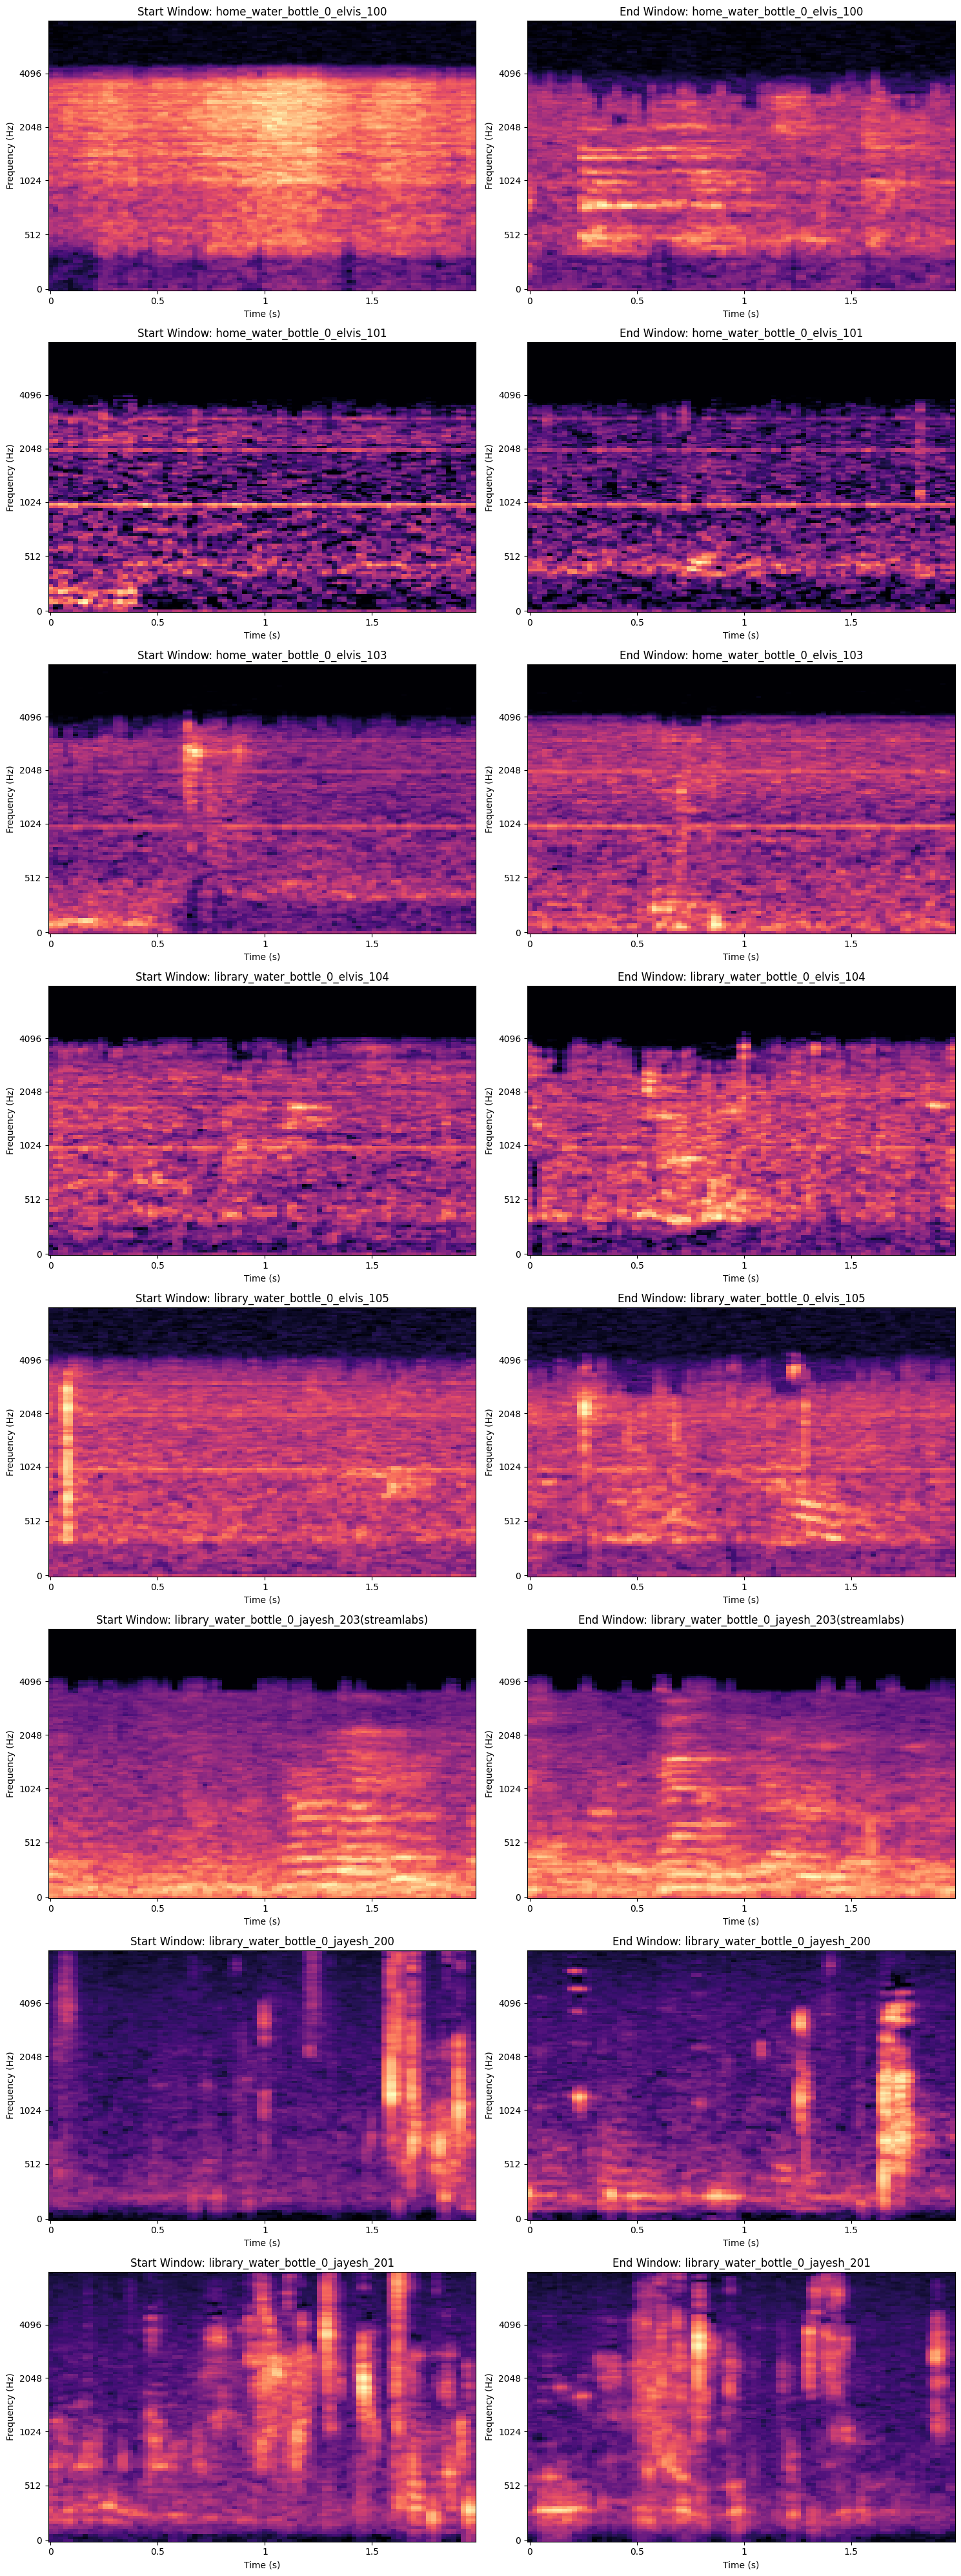

In [11]:
fig, axs = plt.subplots(8, 2, figsize=(15, 40))  # 2 columns for start and end plots

for i, audio_data in enumerate(audio_datas_np):
    # Generate the Mel spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=22050, n_mels=128, fmax=8000)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    
    # Get the start and end times from the `times` dictionary
    start_time = times[file_names[i]][0]
    end_time = times[file_names[i]][1]
    
    # Convert time to frames
    sr = 22050  # Assuming sampling rate is 22050 Hz
    hop_length = 512  # Default hop length, adjust if necessary

    # Calculate frames for the start and end windows (±1 second)
    start_frame = int(start_time * sr / hop_length)
    end_frame = int(end_time * sr / hop_length)
    
    # Define frame windows (±1 second converted to frames)
    frame_window = int(1 * sr / hop_length)  # 1 second in frames

    # Plot the start time window
    librosa.display.specshow(log_spectrogram[:, max(0, start_frame - frame_window):start_frame + frame_window], 
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=8000, ax=axs[i, 0])
    axs[i, 0].set_title(f"Start Window: {mp4_file_names[i] if i < 6 else m4a_file_names[i - 6]}")

    # Plot the end time window
    librosa.display.specshow(log_spectrogram[:, max(0, end_frame - frame_window):end_frame + frame_window], 
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=8000, ax=axs[i, 1])
    axs[i, 1].set_title(f"End Window: {mp4_file_names[i] if i < 6 else m4a_file_names[i - 6]}")

    # Set labels for clarity
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_ylabel('Frequency (Hz)')
    axs[i, 1].set_xlabel('Time (s)')
    axs[i, 1].set_ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


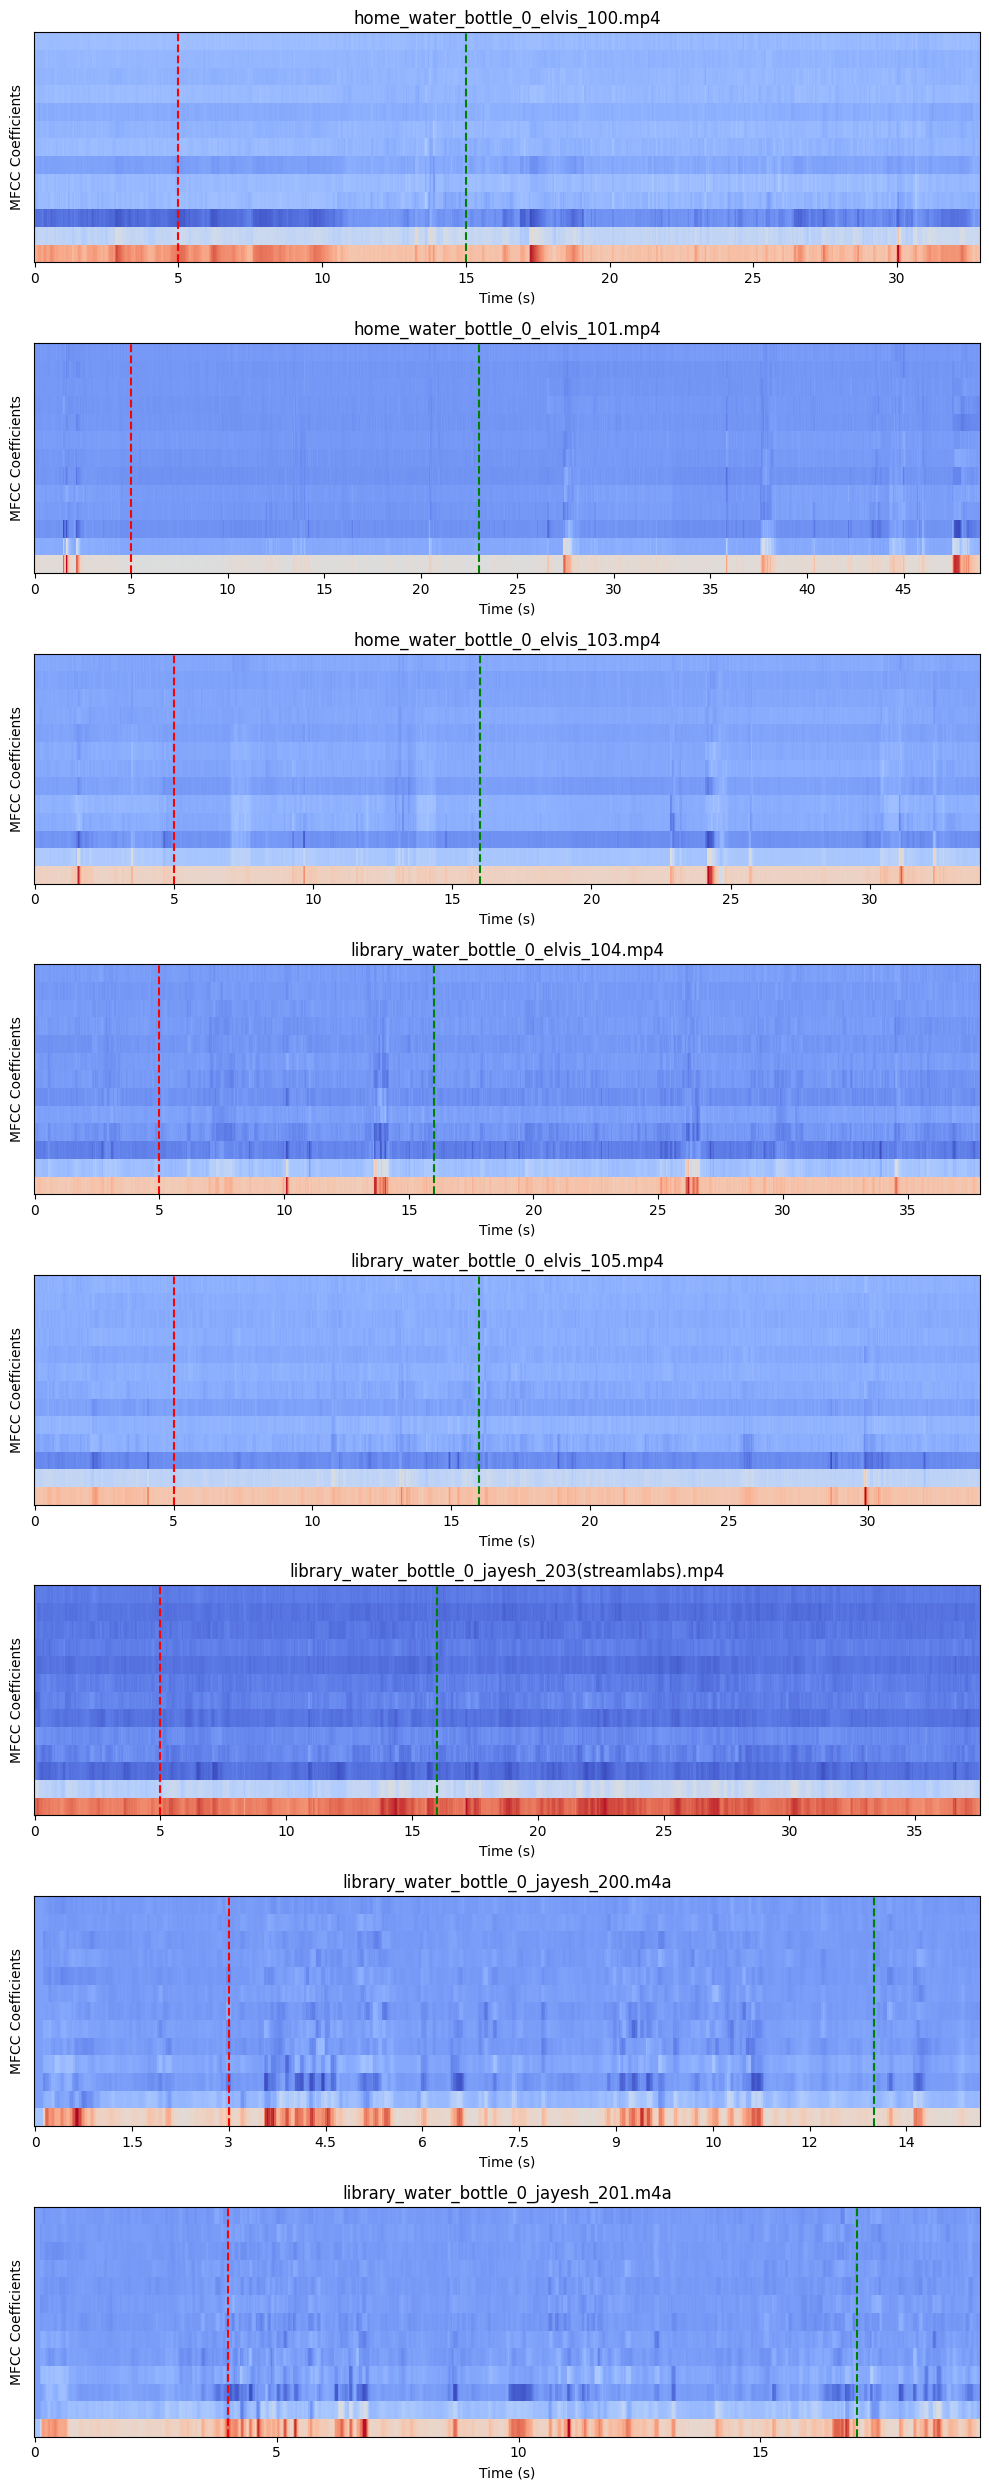

In [12]:
fig, axs = plt.subplots(8, 1, figsize=(10, 25))

for i, audio_data in enumerate(audio_datas_np):
    mfccs = librosa.feature.mfcc(y=audio_data, sr=22050, n_mfcc=13)
    librosa.display.specshow(mfccs, sr=22050, x_axis='time', ax=axs[i])
    axs[i].axvline(x=times[file_names[i]][0], color='r', linestyle='--')
    axs[i].axvline(x=times[file_names[i]][1], color='g', linestyle='--')
    axs[i].set_title(mp4_file_names[i] + '.mp4' if i < 6 else m4a_file_names[i - 6] + '.m4a')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


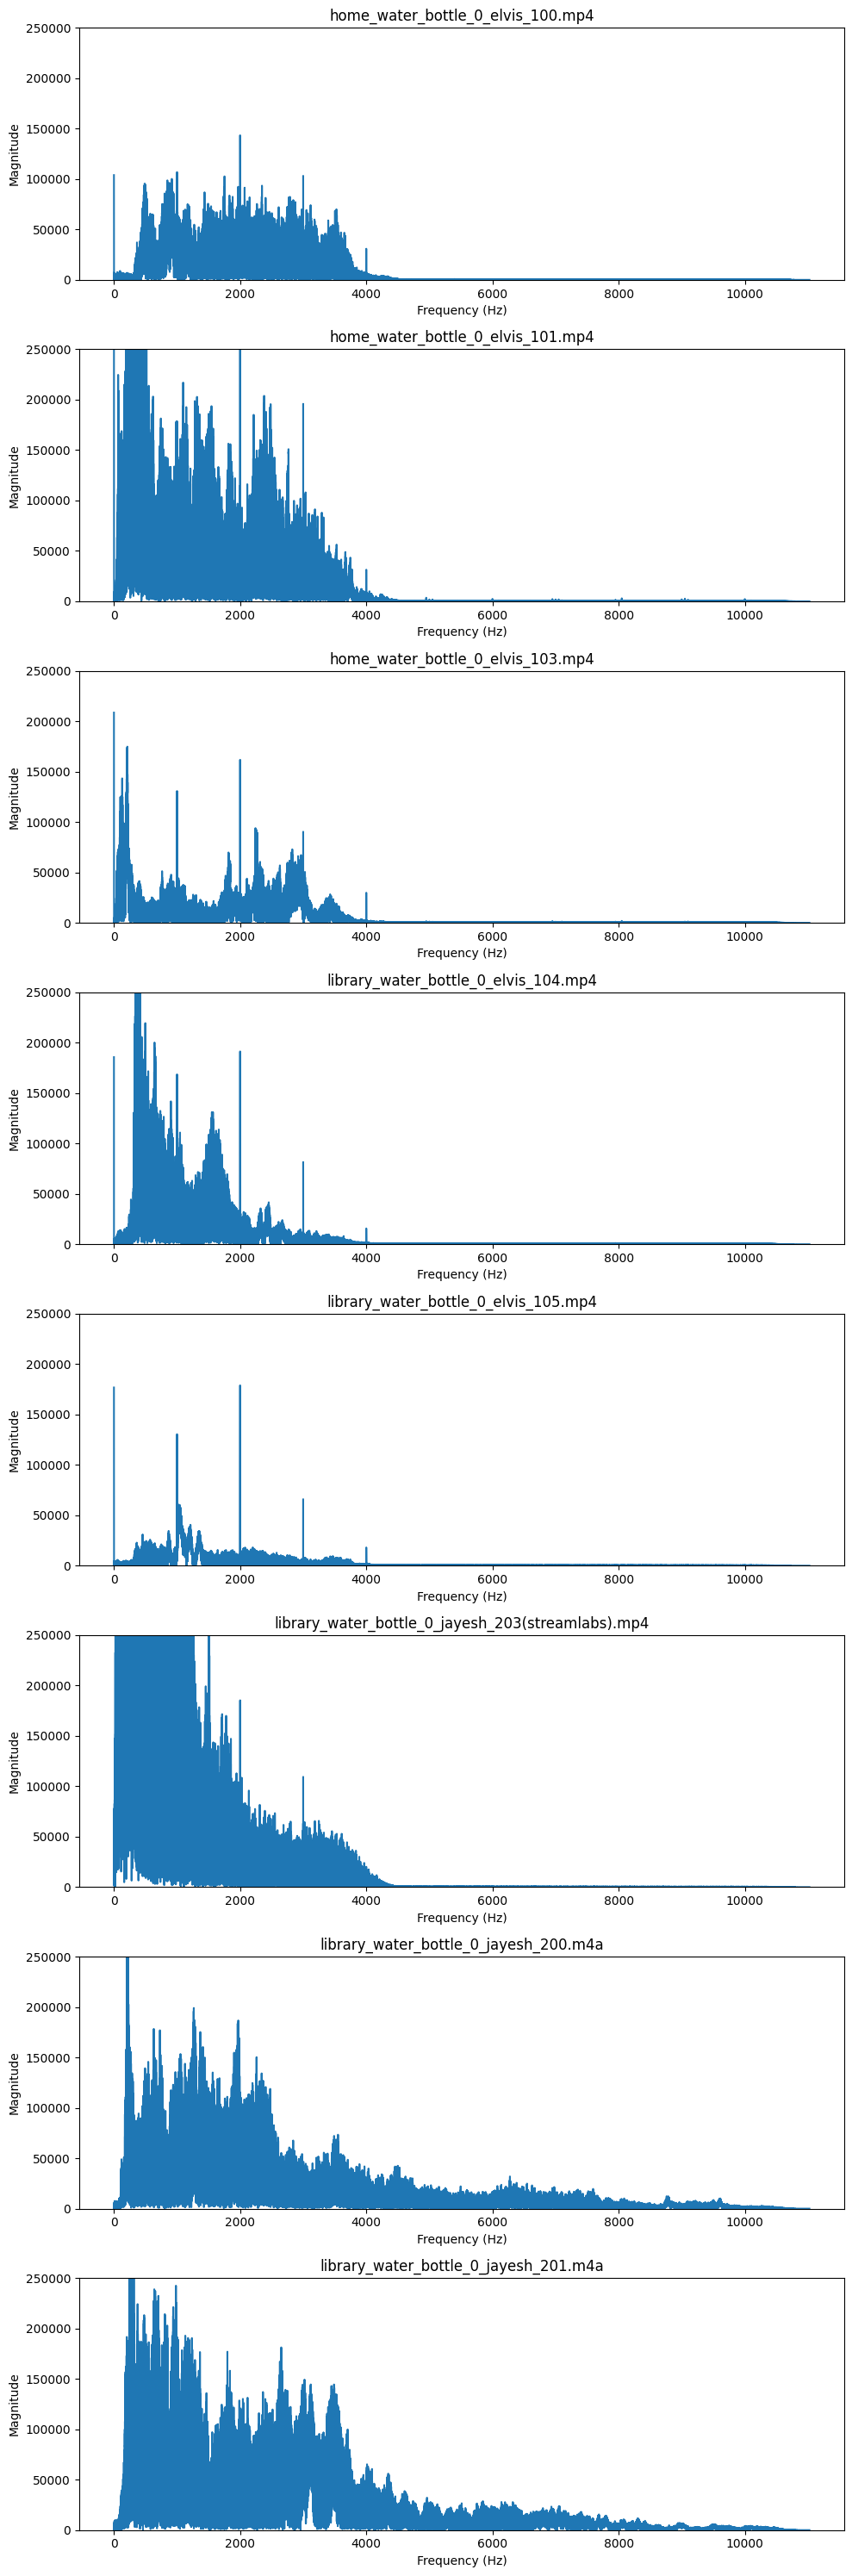

In [13]:
fig, axs = plt.subplots(8, 1, figsize=(10, 30))

for i, audio_data in enumerate(audio_datas_np):
    fft_data = np.fft.fft(audio_data)
    freqs = np.fft.fftfreq(len(fft_data), d=1/22050)
    axs[i].plot(freqs[:len(freqs)//2], np.abs(fft_data[:len(fft_data)//2]))
    axs[i].set_title(mp4_file_names[i] + '.mp4' if i < 6 else m4a_file_names[i - 6                                                                  ] + '.m4a')
    axs[i].set_ylim([0, 250000])
    axs[i].set_xlabel('Frequency (Hz)')
    axs[i].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()
